In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42            # Ensure fonts will be editable as fonts in Illustrator
mpl.rcParams["font.family"] = "sans-serif"   # Use san-serif font in plots


# Customizing scatterplots

In [2]:
dF = pd.read_csv("metadata.tsv", sep="\t", header=0)

Text(20, 50, 'Female')

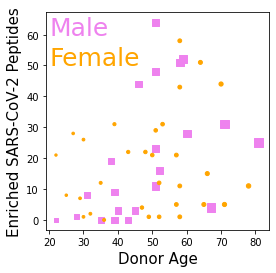

In [32]:
fig, ax = plt.subplots(1,1, figsize=(4,4))

colors = ["violet" if x=="M" else "orange" for x in dF.Sex]

dF_M = dF[dF.Sex=="M"]
dF_F = dF[dF.Sex=="F"]

ax.scatter(dF_M.Age, dF_M.SARS2Peps, c="violet", s=dF_M.Age, marker="s", label="Male")
ax.scatter(dF_F.Age, dF_F.SARS2Peps, c="orange", s=dF_F.Age, marker=".", label="Female")

# Add axes labels
ax.set_xlabel("Donor Age", fontsize=15)
ax.set_ylabel("Enriched SARS-CoV-2 Peptides", fontsize=15)

#ax.legend(fontsize=15, loc="lower left")
ax.text(20, 60, "Male", fontsize="25", color="violet")
ax.text(20, 50, "Female", fontsize="25", color="orange")


# Colormaps

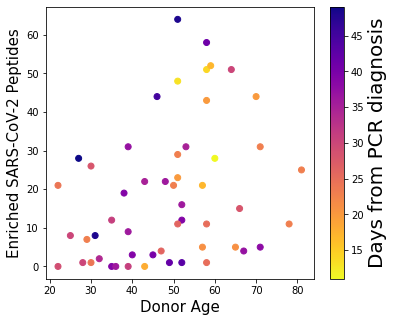

In [40]:
fig,ax = plt.subplots(1,1,figsize=(6,5))

sp = ax.scatter(dF.Age, dF.SARS2Peps, c=dF["Days from PCR diagnosis"], cmap="plasma_r")
ax.set_xlabel("Donor Age", fontsize=15)
ax.set_ylabel("Enriched SARS-CoV-2 Peptides", fontsize=15)

cbar = fig.colorbar(sp)
cbar.set_label("Days from PCR diagnosis", fontsize=20)

# Heat maps

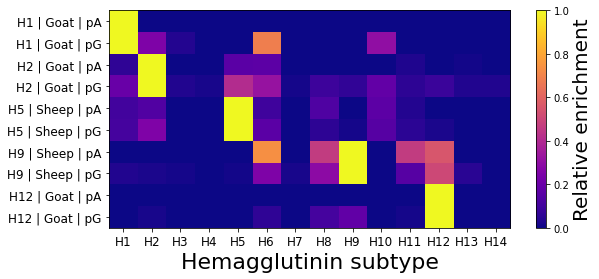

In [71]:
# Read in data, dataframe 
allDF = pd.read_csv("heatmap_data.tsv", sep="\t", header=0)

#Create data only dataframe
dataDF = allDF[allDF.columns[4:]]

fig, ax = plt.subplots(figsize=(9,4), facecolor="w")

im = ax.imshow(dataDF, aspect="auto", cmap="plasma")

cbar = fig.colorbar(im)
cbar.set_label("Relative enrichment", fontsize=20)

# Set x-axis label
ax.set_xlabel("Hemagglutinin subtype", fontsize=22)

ax.set_xticks(range(14))
ax.set_xticklabels(dataDF.columns, fontsize=12)

ax.set_yticks(range(10))

yLabels = []
for index, row in allDF.iterrows():
    yLabels.append(f"{row.HAtype} | {row.Host} | {row.CaptureProtein}")

ax.set_yticklabels(yLabels, fontsize=12)

fig.savefig("heatmap.png", dpi=200, bbox_inches='tight')
fig.savefig("heatmap.pdf", dpi=200, bbox_inches='tight')


In [72]:
df = pd.read_csv("SLE_district_centroids.txt", index_col=0, sep="\t", header=None, names=["Longitude", "Latitude"])

In [73]:
df

,Longitude,Latitude
Kailahun,-10.645754,8.129091
Kenema,-11.165743,7.896995
Kono,-10.866380,8.683284
Bombali,-12.203870,9.293726
Koinadugu,-11.302096,9.329804
Tonkolili,-11.700000,8.750000
Bo,-11.737349,7.920407
WesternUrban,-13.266764,8.466012
Kambia,-13.080380,9.002102
Pujehun,-11.500000,7.300000


In [74]:
json = pd.read_json("SLE_v3.geojson")

In [75]:
json

,type,features
0,FeatureCollection,"{'type': 'Feature', 'id': 66, 'properties': {'..."
1,FeatureCollection,"{'type': 'Feature', 'id': 67, 'properties': {'..."
2,FeatureCollection,"{'type': 'Feature', 'id': 68, 'properties': {'..."
3,FeatureCollection,"{'type': 'Feature', 'id': 69, 'properties': {'..."
4,FeatureCollection,"{'type': 'Feature', 'id': 70, 'properties': {'..."
5,FeatureCollection,"{'type': 'Feature', 'id': 71, 'properties': {'..."
6,FeatureCollection,"{'type': 'Feature', 'id': 72, 'properties': {'..."
7,FeatureCollection,"{'type': 'Feature', 'id': 73, 'properties': {'..."
8,FeatureCollection,"{'type': 'Feature', 'id': 74, 'properties': {'..."
9,FeatureCollection,"{'type': 'Feature', 'id': 75, 'properties': {'..."


(-13.7, -10.0, 6.6, 10.2)

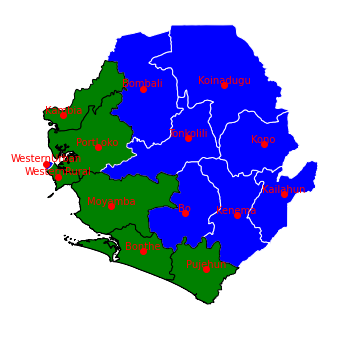

In [97]:
fig, ax = plt.subplots(1,1,figsize=(6,6), facecolor="w")

for loc in json.features:
    pc = np.array(loc["geometry"]["coordinates"], dtype=object)
    
    location = loc["properties"]["location"]
    if loc["geometry"]["type"] == "Polygon":
        poly = plt.Polygon(pc[0], facecolor="blue", edgecolor="white")
        ax.add_patch(poly)
        
        
    elif loc["geometry"]["type"] == "MultiPolygon":
        for part in pc:
            poly = plt.Polygon(part[0], facecolor="green", edgecolor="black")
            ax.add_patch(poly)

    ax.scatter(df.loc[location]["Longitude"], df.loc[location]["Latitude"], c="red")
    ax.text(df.loc[location]["Longitude"], df.loc[location]["Latitude"], location, ha="center", color="red", va="bottom")
    
ax.set_ylim([6.6, 10.2]) 
ax.set_xlim([-13.7, -10])

plt.axis("off")

In [92]:
df.loc["Kailahun"]

Longitude   -10.645754
Latitude      8.129091
Name: Kailahun, dtype: float64